In [5]:
import numpy as np
import cv2 # OpenCV
import matplotlib
import matplotlib.pyplot as plt
import collections
import os

# iscrtavanje slika u notebook-u
%matplotlib inline
# prikaz vecih slika
matplotlib.rcParams['figure.figsize'] = 16,12

# keras                                           -OVO JE DODATO
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation

from tensorflow.keras.optimizers import SGD

In [9]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images 
    

In [49]:
def rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))  # zauzimanje memorije za sliku (nema trece dimenzije)
    img_gray = 0.21*img_rgb[:, :, 0] + 0.72*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')  # u prethodnom koraku smo mnozili sa float, pa sada moramo da vratimo u [0,255] opseg
    return img_gray


def treshold(image):
    treshold_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 5)
    return treshold_image

def opening(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    eroded_image = cv2.erode(image, kernel, iterations=1)
    dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)
    return dilated_image

def closing(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    eroded_image = cv2.erode(dilated_image, kernel, iterations=1)
    return eroded_image


def preparing_images(images):
    for image in images:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #prvo prebacivanje u RGB iz BGR
        image = rgb2gray(image) #radjenje grayscale
        #image = opening(image)
        image = treshold(image)
        #image = closing(image)
        
    return images
        
        
        

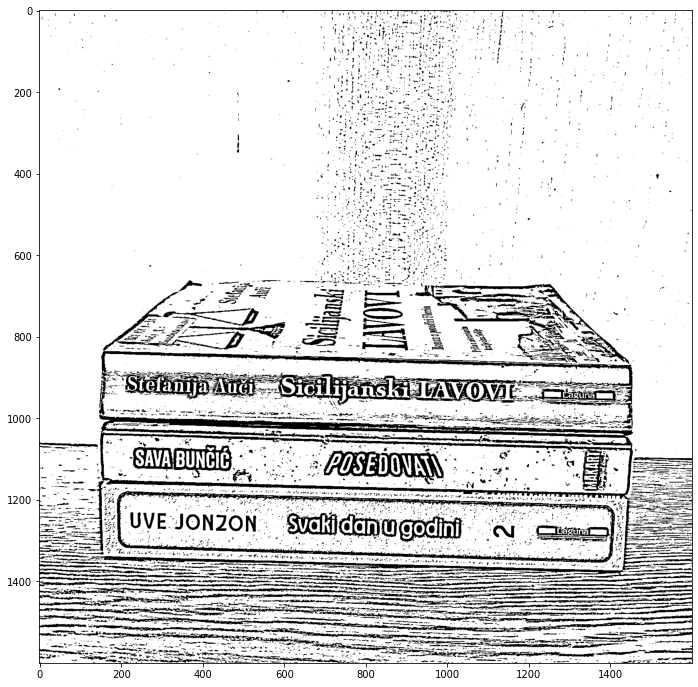

In [50]:
#glavna funkcija (main)
images = load_images_from_folder("skup_podataka")
#img = cv2.imread('skup_podataka/1.jpg')
#images = [img]
images = preparing_images(images)
#plt.imshow(image, 'gray')